In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string

D:\Namrata\ANACONDA app\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import pandas as pd
df = pd.read_csv("diabetes.csv")

In [3]:
# Let's look at the data snippet
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Checking for missing data

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Checking data ranges and basic summary
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# CHecking 0 value rows in specific columns

x = df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] == 0
x = x.sum()
print(x)

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [8]:
# change 0 values to NAN for fewer missing rows
import numpy as np

# Mark as Nan
df[["BloodPressure","Glucose","BMI"]] = df[["BloodPressure","Glucose","BMI"]].replace(0, np.NaN)
# fill missing values with mean column values
df.fillna(df.mean(), inplace=True)

In [9]:
# Checking the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,20.536458,79.799479,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,15.952218,115.244002,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,23.000000,30.500000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


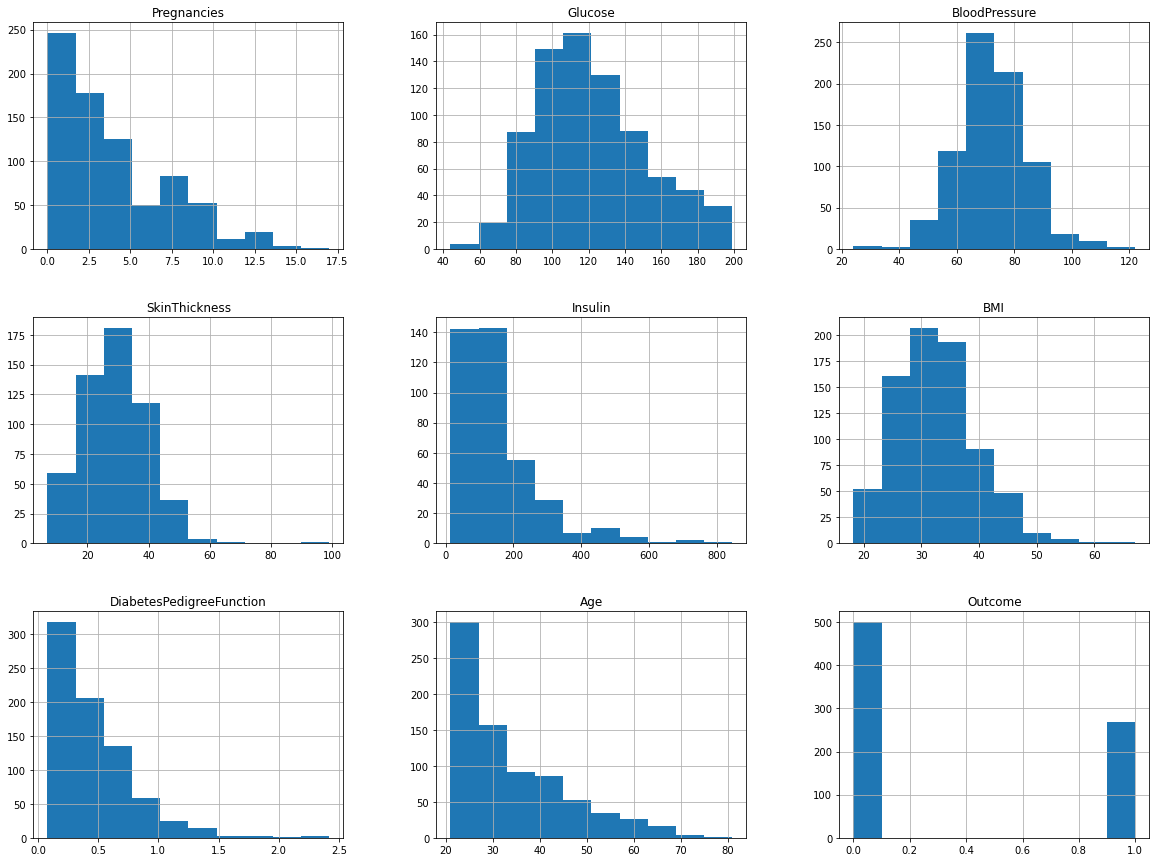

In [10]:
# Mark as Nan
df[["SkinThickness","Insulin"]] = df[["SkinThickness","Insulin"]].replace(0, np.NaN)

fig = df.hist(figsize = (20,15))

In [11]:
# Creating a dataframe df1 with Median values of Skin thickness and median values of Insulin
df1 = df.copy()
df1['SkinThickness'].fillna(df1['SkinThickness'].median(), inplace=True)
df1['Insulin'].fillna(df1['Insulin'].median(), inplace=True)

# Creating a dataframe df2 with Median values for Skin Thickness but removing the missing data for Insulin
df2 = df.copy()
df2['SkinThickness'].fillna(df2['SkinThickness'].median(), inplace=True)
df2.dropna(inplace=True)

In [12]:
# Checking for Null Values in df1

df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [13]:
# Checking for Null Values in df2

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               394 non-null    int64  
 1   Glucose                   394 non-null    float64
 2   BloodPressure             394 non-null    float64
 3   SkinThickness             394 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       394 non-null    float64
 6   DiabetesPedigreeFunction  394 non-null    float64
 7   Age                       394 non-null    int64  
 8   Outcome                   394 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 30.8 KB


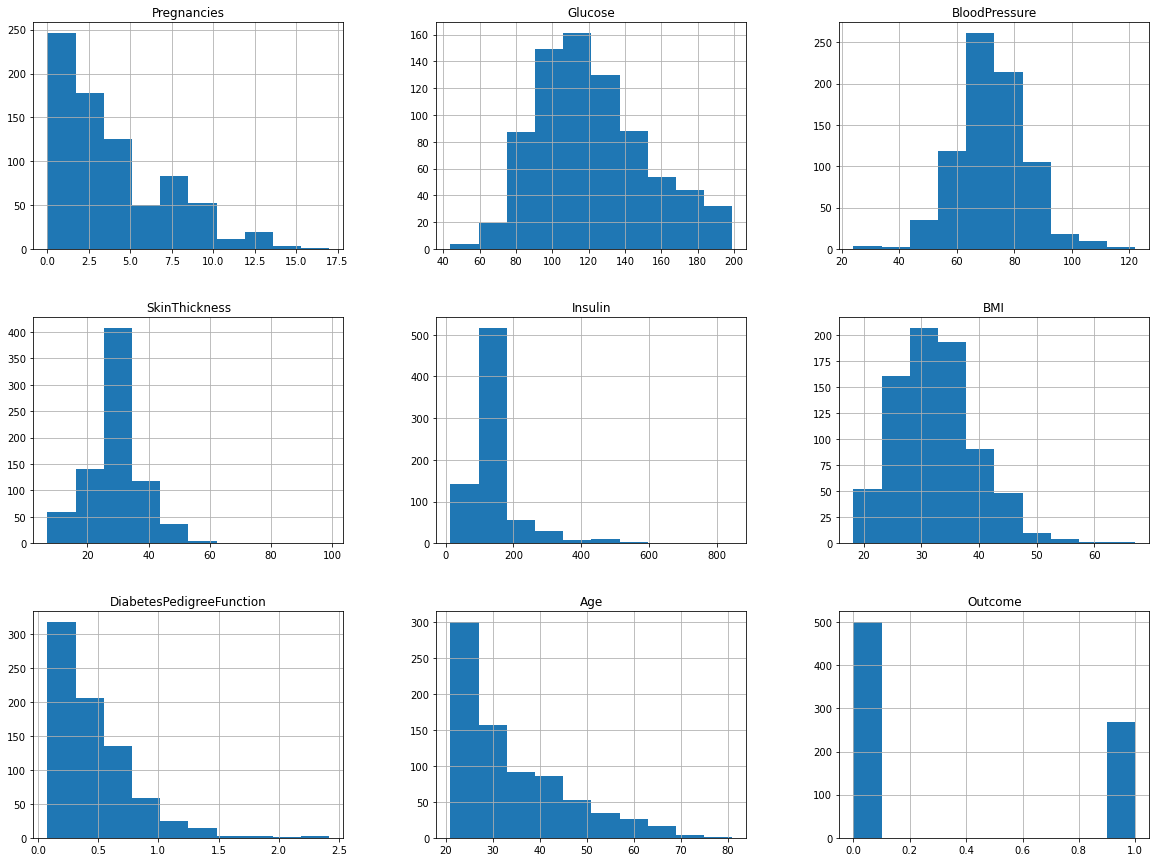

In [14]:
fig = df1.hist(figsize = (20,15))

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt

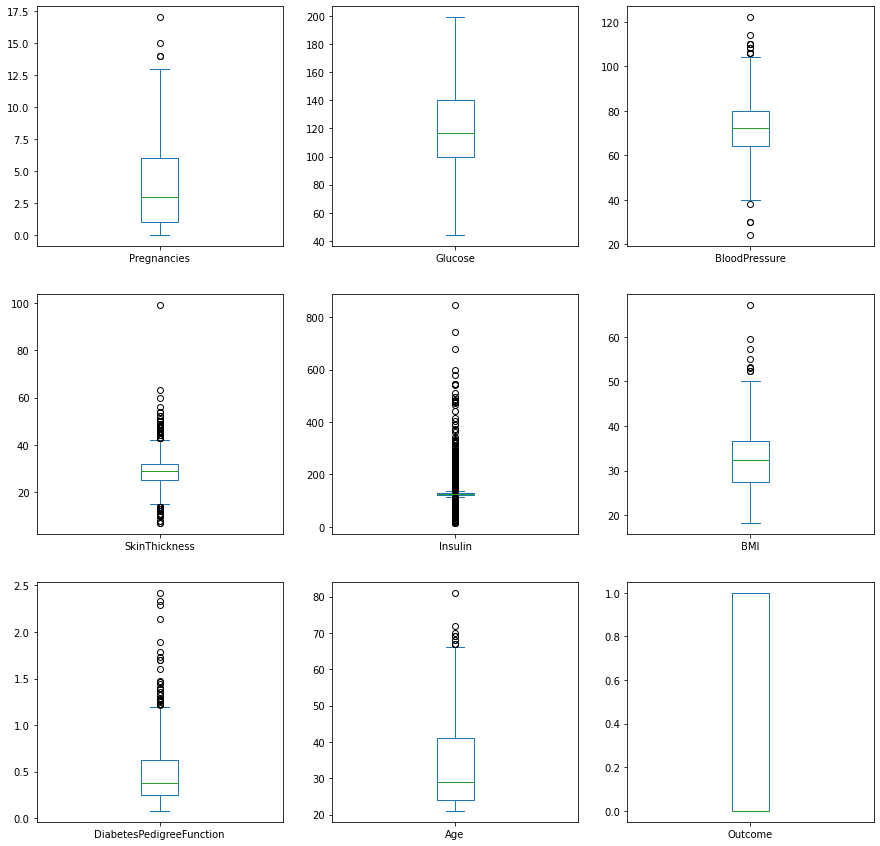

In [16]:
# Data Ranges

#plt.figure()
df1.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15))
plt.show()

In [17]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns





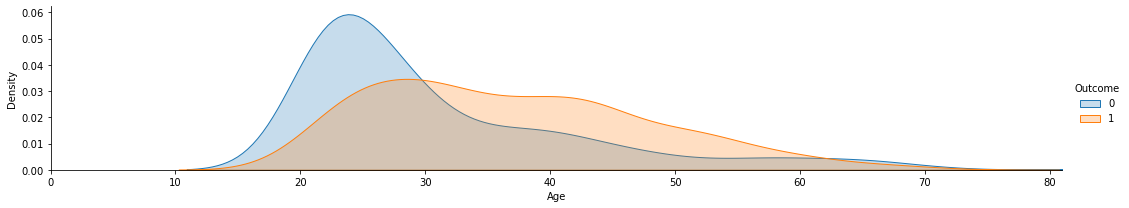

In [18]:
# Age Analysis

fig = sns.FacetGrid(df1, hue="Outcome", aspect =5)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = df1['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

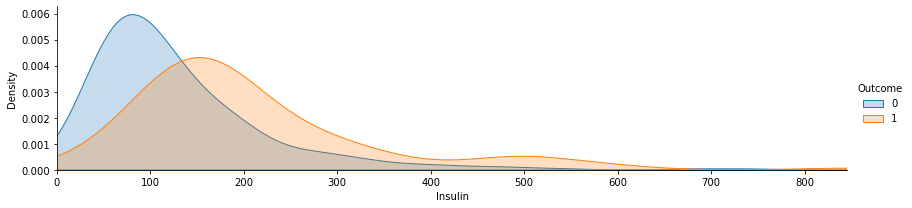

In [19]:
# Insulin

fig = sns.FacetGrid(df2, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'Insulin', shade=True)
oldest = df2['Insulin'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

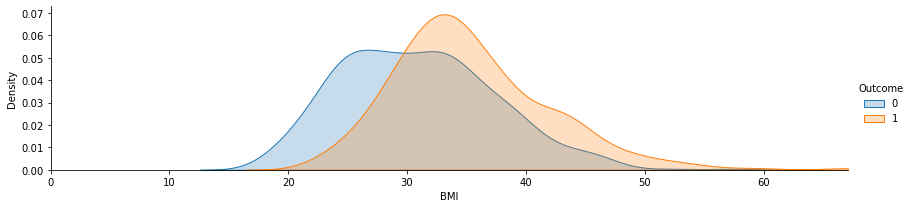

In [20]:
# BMI

fig = sns.FacetGrid(df1, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'BMI', shade=True)
oldest = df1['BMI'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

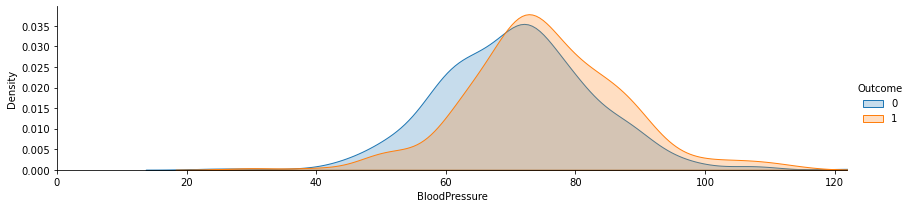

In [21]:
# Blood Pressure

fig = sns.FacetGrid(df1, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'BloodPressure', shade=True)
oldest = df1['BloodPressure'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

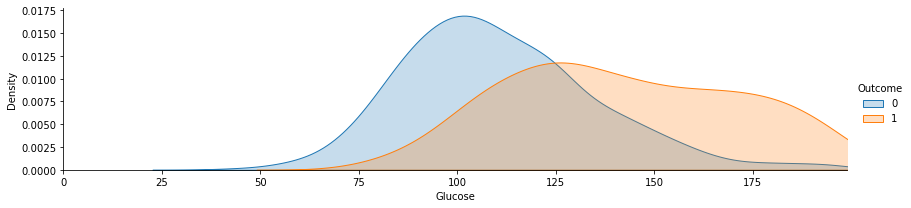

In [22]:
# Glucose

fig = sns.FacetGrid(df1, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'Glucose', shade=True)
oldest = df1['Glucose'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

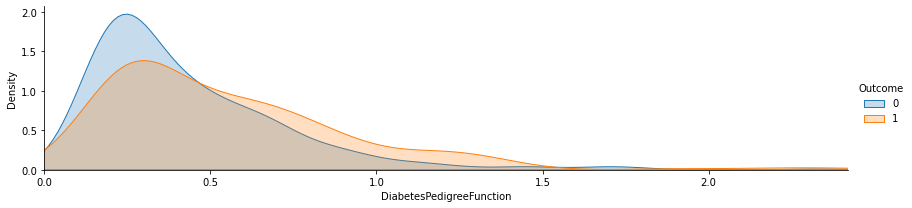

In [23]:
# Diabetes Pedigree Function

fig = sns.FacetGrid(df1, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'DiabetesPedigreeFunction', shade=True)
oldest = df1['DiabetesPedigreeFunction'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

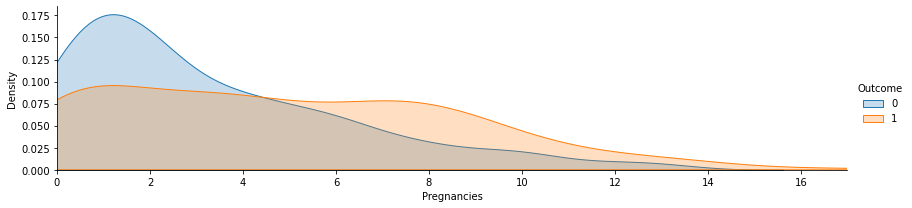

In [24]:
# Pregnancies

fig = sns.FacetGrid(df1, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'Pregnancies', shade=True)
oldest = df1['Pregnancies'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

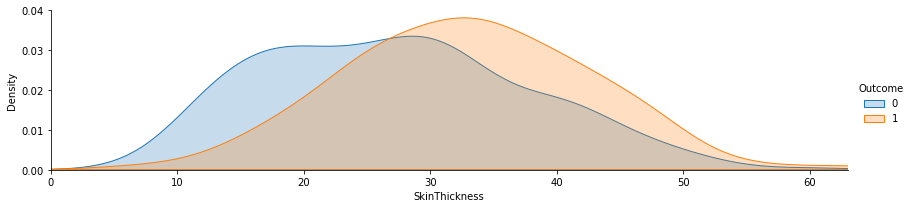

In [25]:
# SkinThickness

fig = sns.FacetGrid(df2, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'SkinThickness', shade=True)
oldest = df2['SkinThickness'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

<AxesSubplot:>

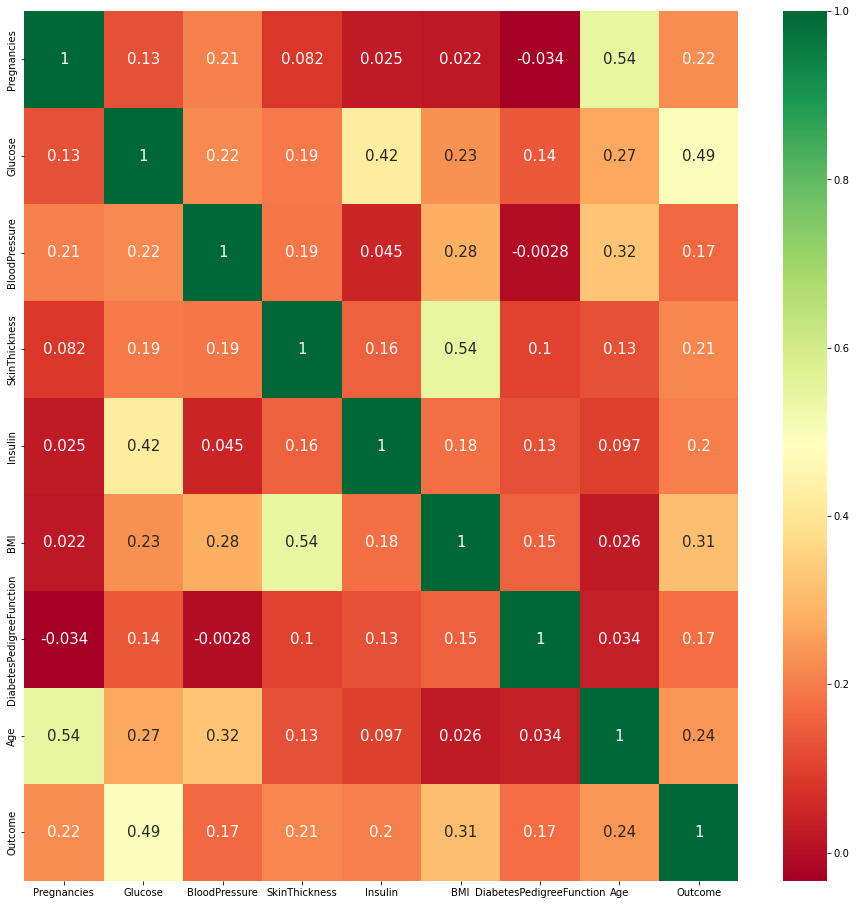

In [26]:
# For dataframe 1 with assumed missing values:

plt.figure(figsize=(16, 16))
sns.heatmap(df1.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

<AxesSubplot:>

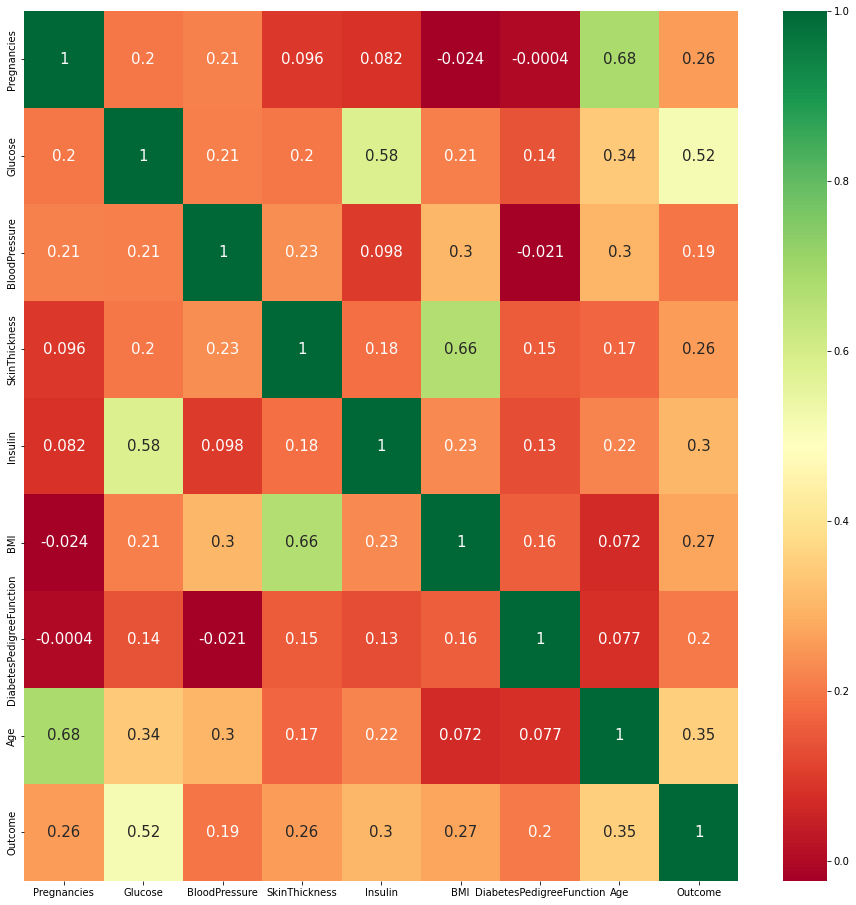

In [27]:
# For dataframe 2 without Insulin missing values:

plt.figure(figsize=(16, 16))
sns.heatmap(df2.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [28]:
from sklearn.model_selection import train_test_split

train,test= train_test_split(df1,test_size=0.25,random_state=0,stratify=df1['Outcome'])# stratify the outcome

train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

m = LogisticRegression()
m.fit(train_X,train_Y)
p = m.predict(test_X)


In [30]:
# Results
print('The accuracy Score is:\n',metrics.accuracy_score(p,test_Y))

The accuracy Score is:
 0.7864583333333334


In [31]:
from sklearn.model_selection import train_test_split

train,test= train_test_split(df2,test_size=0.25,random_state=0,stratify=df2['Outcome'])# stratify the outcome

train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

In [32]:
m = LogisticRegression()
m.fit(train_X,train_Y)
p = m.predict(test_X)

# Accuracy Results
print('The accuracy Score is:\n',metrics.accuracy_score(p,test_Y))

The accuracy Score is:
 0.7474747474747475


In [33]:
# Original data split

from sklearn.model_selection import train_test_split

train,test= train_test_split(df1,test_size=0.25,random_state=0,stratify=df1['Outcome'])# stratify the outcome

train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']


In [34]:
# Random Forest Model

from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100,random_state=0)
model.fit(train_X,train_Y)
p = model.predict(test_X)

# Results
print('The accuracy Score is:\n',metrics.accuracy_score(p,test_Y))


The accuracy Score is:
 0.7708333333333334


In [35]:
pd.Series(model.feature_importances_,index= train_X.columns).sort_values(ascending=False)

Glucose                     0.249622
BMI                         0.154760
Age                         0.143585
DiabetesPedigreeFunction    0.124671
Insulin                     0.085665
BloodPressure               0.083620
Pregnancies                 0.082484
SkinThickness               0.075593
dtype: float64

In [36]:
# RF on df1 without "SkinThickness"

# Train Test Split
train,test= train_test_split(df1[['Glucose','BMI','Age', 'DiabetesPedigreeFunction', 'Insulin', 'BloodPressure','Pregnancies','Outcome']],test_size=0.25,random_state=0,stratify=df1['Outcome'])# stratify the outcome

train_X=train[train.columns[:7]]
test_X=test[test.columns[:7]]
train_Y=train['Outcome']
test_Y=test['Outcome']

# Random Forest Model
model1= RandomForestClassifier(n_estimators=100,random_state=0)
model1.fit(train_X,train_Y)
p1 = model1.predict(test_X)

# Accuracy Results
print('The accuracy Score is:\n',metrics.accuracy_score(p1,test_Y))

The accuracy Score is:
 0.78125


In [37]:
# RF on df1 without "SkinThickness" and "Pregnancies"

# Train Test Split
train,test= train_test_split(df1[['Glucose','BMI','Age', 'DiabetesPedigreeFunction', 'Insulin', 'BloodPressure','Outcome']],test_size=0.25,random_state=0,stratify=df1['Outcome'])# stratify the outcome

train_X=train[train.columns[:6]]
test_X=test[test.columns[:6]]
train_Y=train['Outcome']
test_Y=test['Outcome']

# Random Forest Model
model2= RandomForestClassifier(n_estimators=100,random_state=0)
model2.fit(train_X,train_Y)
p2 = model2.predict(test_X)

# Accuracy Results
print('The accuracy Score is:\n',metrics.accuracy_score(p2,test_Y))

The accuracy Score is:
 0.7708333333333334


In [38]:
# Accuracy Results
print('The accuracy Score is:\n',metrics.accuracy_score(p1,test_Y))
print('\n \n The confusion matrix: \n', metrics.confusion_matrix(p1, test_Y))
print('\n\n The metrics classification report:\n ', metrics.classification_report(p1, test_Y))

The accuracy Score is:
 0.78125

 
 The confusion matrix: 
 [[110  27]
 [ 15  40]]


 The metrics classification report:
                precision    recall  f1-score   support

           0       0.88      0.80      0.84       137
           1       0.60      0.73      0.66        55

    accuracy                           0.78       192
   macro avg       0.74      0.77      0.75       192
weighted avg       0.80      0.78      0.79       192



In [39]:
def extract_features_for_prediction(x_train, y_train, x_test, y_test, pipeline):
   (...)
   return final_x_test[:, :19]

In [40]:
x_demo=[[5,126,70,160,35,0.242,66,0.000]]
if model.predict(x_demo)==0:
    print("Person is likely to NOT have diabetes")
else:
    print("Person is likely to have diabetes")

Person is likely to NOT have diabetes


In [41]:
x_demo=[[9,156,80,256,0,0.2536,99,0.004]]
if model.predict(x_demo)==0:
    print("Person is likely to NOT have diabetes")
else:
    print("Person is likely to  have diabetes") 

Person is likely to  have diabetes
